Importing Modules for project

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Using pandas.read_csv function, I will read in the data for my project. I will then use the .merge function to merge my to datasets by the player column in both datasets. This will give me the Fantasy points and when the player was drafted on average in the same dataset.

In [2]:
df = pd.read_csv('fantasyfootball.csv')
df_2 = pd.read_csv('fantasyfootballrank.csv')
final_df = pd.merge(df, df_2, on = "Player", how = "inner")
print(final_df.head())

   Rk               Player   Tm FantPos  Age   G  GS  Cmp  Att   Yds  ...  \
0   2          Josh Jacobs  LVR      RB   24  17  17    0    0     0  ...   
1   3  Christian McCaffrey  2TM      RB   26  17  16    1    1    34  ...   
2   5     Justin Jefferson  MIN      WR   23  17  17    2    2    34  ...   
3   6        Austin Ekeler  LAC      RB   27  17  17    0    0     0  ...   
4   7           Josh Allen  BUF      QB   26  16  16  359  567  4283  ...   

     VBD  PosRank  OvRank     -9999  RK  Team  Position   AVG   Min   Max  
0  127.0        1     2.0  JacoJo01  54   LV         RB  56.0  44.0  64.0  
1  123.0        2     3.0  McCaCh01   1  CAR         RB   1.2   1.0   2.0  
2  119.0        1     5.0  JeffJu00   5  MIN         WR   6.0   3.0  10.0  
3  118.0        4     6.0  EkelAu00   3  LAC         RB   4.4   2.0   7.0  
4  117.0        2     7.0  AlleJo02  36  BUF         QB  36.0  36.0  36.0  

[5 rows x 40 columns]


Now, I will clean my data to get my dataset in a format that I want to work with. There are many columns that I don't need. I will use .drop function to remove those. I also have columns that need to be renamed so I'll use the .rename function to name these so it is easier to know what the column represents.

In [3]:
final_df = final_df.drop(['Fmb','FL','2PM' ,'2PP', 'DKPt' , 'FDPt' , 'VBD' , 'PosRank' , 'OvRank' , '-9999', 'Team' , 'Position', 'Min' , 'Max','Rk', 'RK', ], axis=1)
final_df = final_df.rename(columns={'Tm': 'Team', 'FantPos': 'Position', 'Yds': 'PassingYds','TD.3': 'AllTD', 'Att': 'PassAtt', 'Yds.2': 'RecYds', 'TD.2': 'RecTD','TD.1':'RushTD','TD':'PassTD','Att.1': 'RushAtt', 'Yd.1':'RushYds','PPR': 'FantasyPoints', 'AVG': 'AverageDraftPosition','Yds.1': 'RushYds'})
print(final_df.head())

                Player Team Position  Age   G  GS  Cmp  PassAtt  PassingYds  \
0          Josh Jacobs  LVR       RB   24  17  17    0        0           0   
1  Christian McCaffrey  2TM       RB   26  17  16    1        1          34   
2     Justin Jefferson  MIN       WR   23  17  17    2        2          34   
3        Austin Ekeler  LAC       RB   27  17  17    0        0           0   
4           Josh Allen  BUF       QB   26  16  16  359      567        4283   

   PassTD  ...  RushTD  Tgt  Rec  RecYds    Y/R  RecTD  AllTD  FantPt  \
0       0  ...      12   64   53     400   7.55      0     12   275.0   
1       1  ...       8  108   85     741   8.72      5     13   271.0   
2       0  ...       1  184  128    1809  14.13      8      9   241.0   
3       0  ...      13  127  107     722   6.75      5     18   266.0   
4      35  ...       7    0    0       0    NaN      0      7   396.0   

   FantasyPoints  AverageDraftPosition  
0          328.3                  56.0  
1   

I want to put the data into separate dataframes based on the position the football player plays. This will allow me to view the data for each position individually and then I can view them in comparison with each other. I will create each dataframe for running backs, quarterbacks, wide recievers, and tight ends. I will then create variables equal to the columns I want to include for each. I then create a function that allows me set the columns equal to each dataframe represent by position.

In [4]:
rb_df = final_df[final_df['Position'] == 'RB']
qb_df = final_df[final_df['Position'] == 'QB']
wr_df = final_df[final_df['Position'] == 'WR']
te_df = final_df[final_df['Position'] == 'TE']



rushing_column = ['RushAtt', 'RushYds', 'Y/A', 'RushTD', 'AllTD']
recieving_column = ['Tgt', 'Rec', 'RecYds', 'Y/R', 'RecTD']
passing_column = ['Cmp', 'PassAtt', 'PassingYds', 'PassTD', 'Int']


def position_columns(df, new_column):
    df = df[['Player', 'Position', 'Team', 'G', 'GS','FantasyPoints', 'Age', 'AverageDraftPosition'] + new_column]
    return df

rb_df = position_columns(rb_df, rushing_column+recieving_column)
wr_df = position_columns(wr_df, recieving_column+rushing_column)
qb_df = position_columns(qb_df, passing_column+rushing_column)
te_df = position_columns(te_df, recieving_column+rushing_column)

print(rb_df.head())

                 Player Position Team   G  GS  FantasyPoints  Age  \
0           Josh Jacobs       RB  LVR  17  17          328.3   24   
1   Christian McCaffrey       RB  2TM  17  16          356.4   26   
3         Austin Ekeler       RB  LAC  17  17          372.7   27   
7            Nick Chubb       RB  CLE  17  17          281.4   27   
12       Saquon Barkley       RB  NYG  16  16          284.0   25   

    AverageDraftPosition  RushAtt  RushYds   Y/A  RushTD  AllTD  Tgt  Rec  \
0                   56.0      340     1653  4.86      12     12   64   53   
1                    1.2      244     1139  4.67       8     13  108   85   
3                    4.4      204      915  4.49      13     18  127  107   
7                   29.6      302     1525  5.05      12     13   37   27   
12                  12.4      295     1312  4.45      10     10   76   57   

    RecYds   Y/R  RecTD  
0      400  7.55      0  
1      741  8.72      5  
3      722  6.75      5  
7      239  8.85  

I want to create two new columns to add to my data. I want a column for Fantasy Points per game. To do this I will divide the FantasyPoints column by the Games(G) column. I also want a Usage column. This will represent the amount of time a player gets the ball. For running backs this is rushing attempts(RushAtt) and Passing Targets(Tgt). 

In [5]:
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))


wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints']/wr_df['G']
wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))


te_df['FantasyPoints/GM'] = te_df['FantasyPoints']/te_df['G']
te_df['FantasyPoints/GM'] = te_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))


qb_df['FantasyPoints/GM'] = qb_df['FantasyPoints']/qb_df['G']
qb_df['FantasyPoints/GM'] = qb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))


print(rb_df.head())

                 Player Position Team   G  GS  FantasyPoints  Age  \
0           Josh Jacobs       RB  LVR  17  17          328.3   24   
1   Christian McCaffrey       RB  2TM  17  16          356.4   26   
3         Austin Ekeler       RB  LAC  17  17          372.7   27   
7            Nick Chubb       RB  CLE  17  17          281.4   27   
12       Saquon Barkley       RB  NYG  16  16          284.0   25   

    AverageDraftPosition  RushAtt  RushYds   Y/A  RushTD  AllTD  Tgt  Rec  \
0                   56.0      340     1653  4.86      12     12   64   53   
1                    1.2      244     1139  4.67       8     13  108   85   
3                    4.4      204      915  4.49      13     18  127  107   
7                   29.6      302     1525  5.05      12     13   37   27   
12                  12.4      295     1312  4.45      10     10   76   57   

    RecYds   Y/R  RecTD  FantasyPoints/GM  
0      400  7.55      0             19.31  
1      741  8.72      5           

I want to visualize each dataframe individually and then I will put all the dataframes together to visualize each dataset together. I will use Seaborn to do this.

Running Back Visualization

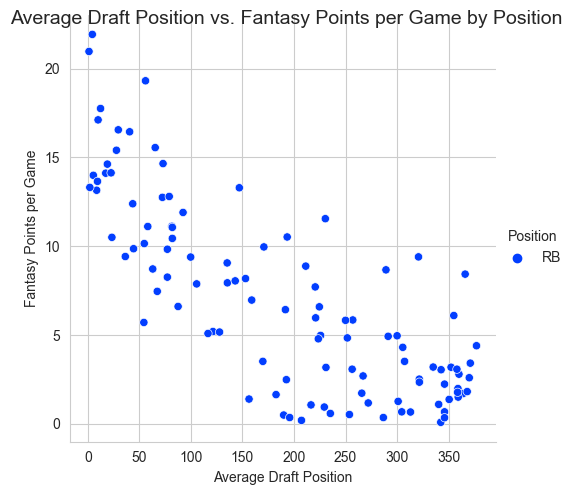

In [6]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=rb_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position')


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()




Wide Reciever Visualization

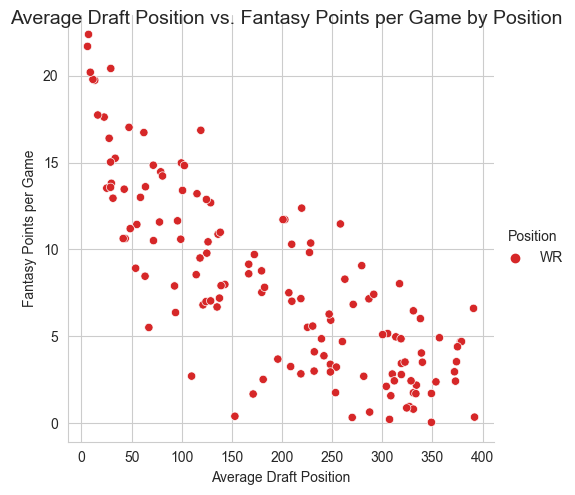

In [7]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=wr_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position',palette=palette)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

Tight End Visualization

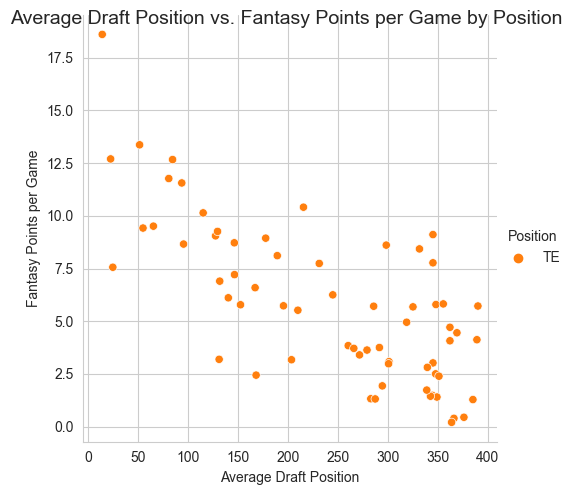

In [9]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=te_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position',palette=palette)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

Quarterback Visualization

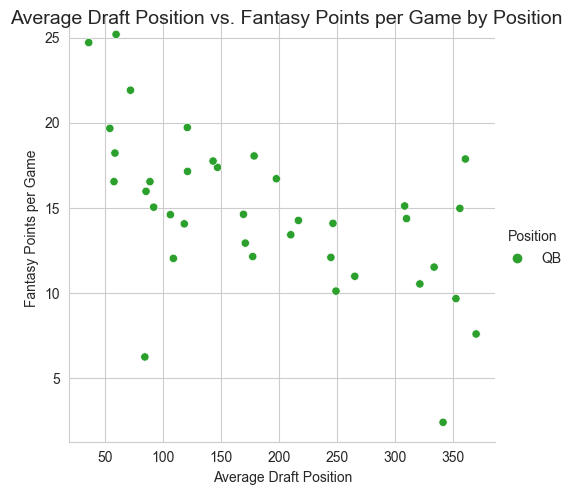

In [11]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=qb_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position',palette=palette)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

I will use the pd.concat to combine all the dataframes into one so I can view them in the same Plot all together.

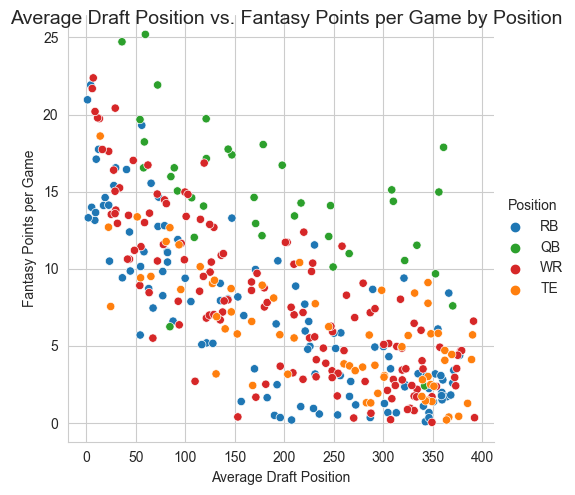

In [13]:
df_merged = pd.concat([rb_df, qb_df, wr_df, te_df], ignore_index=True, sort=False)

sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=df_merged, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position',palette=palette)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()